In [1]:
import numpy as np
import pandas as pd
from tools.get_data.get_data_h5 import *
from pandasgui import show
import talib as ta
import datetime
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 1000)


### 1. 获取factor数据

In [2]:
from importlib import reload
import factors as dl
reload(dl)
run = 0
if run == 1:
    data = get_data(symbol="rb99", freq="minbar", type="future",
                    source_dir="Y:/DataBase_RQ_files/")
    data["sma_diff_5"] = dl.sma_diff(data, 5)
    data["sma_diff_60"] = dl.sma_diff(data, 60)
    data["ema_diff_10"] = dl.ema_diff(data, 10)
    data["ema_diff_60"] = dl.ema_diff(data, 60)
    data["sma_of_sma_5_5"] = dl.sma_of_sma(data, 5, 5)
    data["ema_of_ema_5_5"] = dl.ema_of_ema(data, 5, 5)
    data["high_30"] = dl.high(data, 30)
    data["low_30"] = dl.low(data, 30)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["wl_30"] = dl.wl(data, 30)
    data["wl_60"] = dl.wl(data, 60)
    data["macd_dif"], data["macd_dea"], data["macd_hist"], data["macd_signal"] = dl.MACD(
        data, fast=10, slow=60, mid=15)
    data["slope"] = dl.slope(data, 60)
    data["rsi"] = dl.rsi(data, 60)
    data["sar"] = dl.sar(data)
    data["rwr"] = dl.rwr(data, 60)
    data["aroon_up"], data["aroon_down"], data["aroon"] = dl.aroon(data, 60)
    data["tendstrength"] = dl.tendstrength(data, 60)
    data["boll"] = dl.boll(data, 60)
    data["don"] = dl.don(data, 60)
    data["sf01"] = dl.sf01(data, 60)
    data["cor_vol"] = dl.cor_vol(data, 60)
    data["cor_oi"] = dl.cor_oi(data, 60)

    l = [1, 3, 5] + (list(range(10, 201, 5)))
    for i in l:
        data["shift_{}_rtn".format(i)] = dl.rtn_shift(data.close, i)
    print("liqka前工作完成", len(data))

    data["long_liqka"] = dl.long_liqka(data)
    data["short_liqka"] = dl.short_liqka(data)

    data.to_feather("factor.feather")
    data = pd.read_feather("factor.feather")
    data.dropna(inplace=True)

### 2. 因子分析

In [3]:
from importlib import reload    
import factor_analysis as fa
reload(fa)
# data =data.head(42000)

# print("factos_cols", factors_cols,"\nrtn_cols",rtn_cols)
run = 0
if run == 1:
    data.set_index("datetime", inplace=True, drop=True)
    factors_cols = []
    rtn_cols = []
    for col in data.columns:
        if col not in ['datetime', 'trading_date', "symbol"]:
            if "rtn" not in col and "liqka" not in col:
                factors_cols.append(col)
            else:
                rtn_cols.append(col)
    factors = data[factors_cols]
    rtn = data[rtn_cols]
    fal = fa.FactorAnalysis_ori()
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=20000)

In [4]:
rank_df =pd.read_parquet("symbol_2000_10_rank_df.parquet")
#results_df =pd.read_parquet("symbol_10_results_df.parquet")
# show(rank_df.head(500))


In [5]:
a = rank_df.copy()
a.head(5)

,open,high,low,close,volume,total_turnover,open_interest,sma_diff_5,sma_diff_20000,ema_diff_300,...,aroon_rank,aroon_down_rank,rsi_100_rank,rwr_100_rank,tendstrength_rank,boll_rank,cor_vol_rank,cor_oi_rank,don_rank,sf01_rank
datetime,,,,,,,,,,,,,,,,,,,,,
2010-05-28 14:10:00,4258.8219,4259.8129,4257.9434,4257.9830,6172.0,262790920.0,1462334,2.266566e-02,5.440412,0.347463,...,9.0,1.0,1.0,1.0,0.0,1.0,8.0,3.0,0.0,1.0
2010-05-28 14:11:00,4257.9828,4257.9828,4257.9828,4257.9828,882.0,37529100.0,1462436,1.070601e-02,5.440198,0.345158,...,9.0,0.0,1.0,1.0,0.0,1.0,8.0,3.0,0.0,1.0
2010-05-28 14:12:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,7.150804e-03,5.439978,0.342865,...,9.0,0.0,1.0,1.0,0.0,1.0,8.0,3.0,0.0,1.0
2010-05-28 14:13:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,3.592781e-03,5.439758,0.340587,...,9.0,0.0,1.0,1.0,0.0,1.0,8.0,3.0,1.0,1.0
2010-05-28 14:14:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,9.394120e-07,5.439538,0.338324,...,8.0,2.0,1.0,1.0,0.0,1.0,8.0,3.0,1.0,1.0


In [ ]:
def rtn_shift(data: pd.Series, n):
    """
    计算n期的对数收益率
    """
    return (data.shift(-n) - data)/ data * 100#  -0.020000

    # return (np.log(data / data.shift(n))-1/10000) * 100

a1 = a[['close','rsi_60','shift_1_rtn', 'shift_3_rtn', 'shift_5_rtn',  'shift_10_rtn']]
a1['test1'] = rtn_shift(a1['close'], 1)
a1['test3'] = rtn_shift(a1['close'], 3)
a1['test5'] = rtn_shift(a1['close'], 5)
a1['test10'] = rtn_shift(a1['close'], 10)
a1.head(20)

In [ ]:
a1['']

In [ ]:
4257.9828 - 4257.9830

# MOD@1 查看因子rank的分组频数

In [6]:
# MOD1 查看因子rank的分组频数
a = rank_df.copy()
x = []
y = []
for i in a.columns:
    if "rank" in i:
        x.append(i)
    elif 'shift_' in i:
        y.append(i)

rtn_col = y
factors_col = x
        
counts = {}
for i in factors_col:
    # print(i)
    data = {}
    for ii , d in a.groupby(i):
        #print(i, ii, len(d))
        
        data[ii] = len(d)
    counts[i] = data
countdf = pd.DataFrame(counts)#.transpose()
countdf

,open_interest_rank,open_rank,low_60_rank,high_60_rank,low_rank,high_rank,close_rank,sma_diff_sma_5_100_rank,ema_diff_1000_rank,ema_diff_300_rank,...,aroon_rank,aroon_down_rank,rsi_100_rank,rwr_100_rank,tendstrength_rank,boll_rank,cor_vol_rank,cor_oi_rank,don_rank,sf01_rank
0.0,213229,196814,109689,109860,195807,198058,196801,100361,137421,111418,...,105138,138715,108263,105322,105179,101324,104704,147337,101441,99784
1.0,80372,83769,92431,92655,83880,83526,83834,96264,92234,94672,...,95009,92020,96710,96211,95910,99940,96344,90337,97642,96892
2.0,68597,69582,94325,93971,69409,69493,69589,95813,85527,93664,...,97106,96409,94813,94476,94607,95221,97006,80817,95914,96547
3.0,61557,63778,94868,94657,63995,63765,63648,95327,82945,92003,...,95999,96817,93288,94671,94694,96196,94148,81306,96023,96253
4.0,60460,61185,95638,95535,61374,60921,61152,96657,82953,90904,...,94229,96565,92088,95064,94609,92731,93591,80513,94592,95029
5.0,59999,62705,96957,96638,62441,62844,62811,96286,82365,92486,...,96891,96251,91125,94069,94095,92731,95443,82219,94396,96004
6.0,62210,66787,98468,98480,66773,67050,66810,96738,83095,92610,...,96593,96500,92622,94823,94374,95016,93309,83113,94555,96386
7.0,74981,73432,101499,101083,73495,73083,73347,96713,87886,93925,...,94865,98259,95561,93752,95103,97443,94513,83216,96360,96461
8.0,89619,90508,109087,110152,90339,90824,90546,95260,94865,96040,...,97198,99339,97068,96144,95913,98976,97581,91719,98408,97230
9.0,199331,201795,77393,77324,202842,200791,201817,100936,141064,112633,...,97327,59480,108817,105823,105871,100777,103716,149778,101024,99769


<AxesSubplot:>

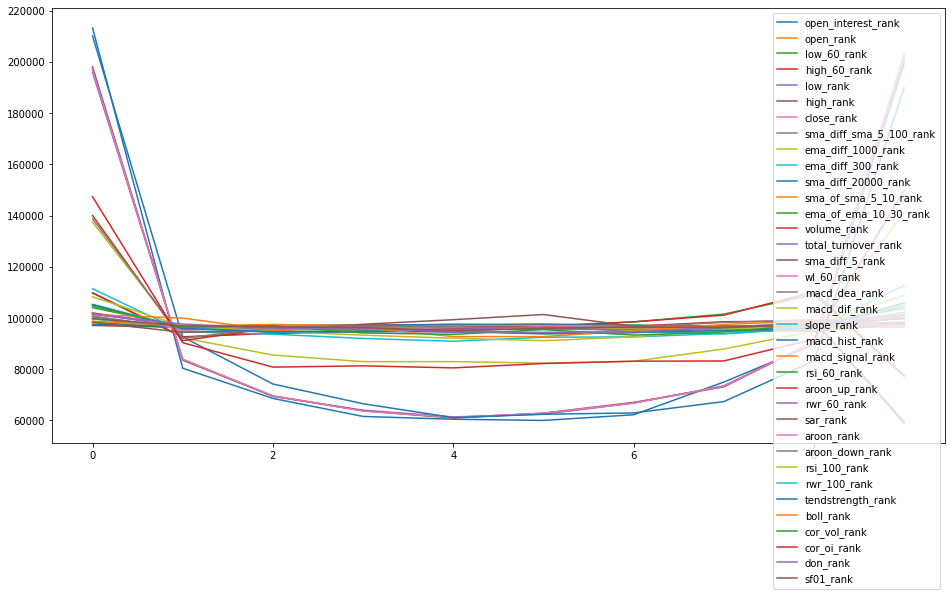

In [7]:
countdf.plot(figsize=(16,8))

In [8]:
countdfv = countdf.transpose()
countdfv

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
open_interest_rank,213229,80372,68597,61557,60460,59999,62210,74981,89619,199331
open_rank,196814,83769,69582,63778,61185,62705,66787,73432,90508,201795
low_60_rank,109689,92431,94325,94868,95638,96957,98468,101499,109087,77393
high_60_rank,109860,92655,93971,94657,95535,96638,98480,101083,110152,77324
low_rank,195807,83880,69409,63995,61374,62441,66773,73495,90339,202842
high_rank,198058,83526,69493,63765,60921,62844,67050,73083,90824,200791
close_rank,196801,83834,69589,63648,61152,62811,66810,73347,90546,201817
sma_diff_sma_5_100_rank,100361,96264,95813,95327,96657,96286,96738,96713,95260,100936
ema_diff_1000_rank,137421,92234,85527,82945,82953,82365,83095,87886,94865,141064
ema_diff_300_rank,111418,94672,93664,92003,90904,92486,92610,93925,96040,112633


# MOD@2  补全y：n分钟后的收益率

In [9]:
# 先删除
for i in a.columns:
    if '_rtn' in i:
        del a[i]

# 后补全
l = [1, 3, 5] + (list(range(10, 201, 5)))
for i in l:
    name = f'shift_{i}_rtn'
    a[name] = (a['close'].shift(-i) - a["close"])  /a["close"]
a.head(5)

c:\vnstudio\lib\site-packages\ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


,open,high,low,close,volume,total_turnover,open_interest,sma_diff_5,sma_diff_20000,ema_diff_300,...,shift_155_rtn,shift_160_rtn,shift_165_rtn,shift_170_rtn,shift_175_rtn,shift_180_rtn,shift_185_rtn,shift_190_rtn,shift_195_rtn,shift_200_rtn
datetime,,,,,,,,,,,,,,,,,,,,,
2010-05-28 14:10:00,4258.8219,4259.8129,4257.9434,4257.9830,6172.0,262790920.0,1462334,2.266566e-02,5.440412,0.347463,...,-0.001993,-0.000557,-0.000338,-0.001224,-0.000572,-0.001877,-0.002259,-0.003449,-0.003904,-0.005275
2010-05-28 14:11:00,4257.9828,4257.9828,4257.9828,4257.9828,882.0,37529100.0,1462436,1.070601e-02,5.440198,0.345158,...,-0.000635,-0.000125,-0.000757,-0.001836,-0.001430,-0.001439,-0.002766,-0.003259,-0.003458,-0.004670
2010-05-28 14:12:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,7.150804e-03,5.439978,0.342865,...,-0.000840,-0.000758,-0.000761,-0.001635,-0.002093,-0.001876,-0.002748,-0.003242,-0.003677,-0.004227
2010-05-28 14:13:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,3.592781e-03,5.439758,0.340587,...,-0.001044,-0.001155,-0.000761,-0.001635,-0.001863,-0.002282,-0.003400,-0.003896,-0.004806,-0.004421
2010-05-28 14:14:00,4257.9828,4257.9828,4257.9828,4257.9828,0.0,0.0,1462436,9.394120e-07,5.439538,0.338324,...,-0.001048,-0.000540,-0.001423,-0.000999,-0.001658,-0.002076,-0.003876,-0.003697,-0.004614,-0.004641


# MOD@3 查看前n名的胜率

In [10]:
def _win_rate(series):
    return (series > 0).mean()*100

results = pd.DataFrame()

for i in factors_col:
    mean_rtn = a.groupby(i)[
        [rtn for rtn in rtn_col]].mean()
    win_rate = a.groupby(i)[
        [rtn for rtn in rtn_col]].apply(_win_rate)
    
    result = pd.merge(
        mean_rtn, win_rate, on=i, how="outer", suffixes=("_mean", "_win_rate"))
    # result.index.name = "rank"
    result.index = pd.MultiIndex.from_product([[i.replace("_rank", '')], result.index])
    results = pd.concat([results, result], axis=0)
    results.index.names = ["factor", "rank"]    

In [13]:
def returns_select(results, top=3):
    """
    返回一个dict, key为因子名, values为一个dataframe, 包含前top名的mean_rtn, win_rate
    results: factor_ranked的返回值

    """
    top10_rtn = {}
    for i in results.columns:
        if "mean" in i:
            j = i.replace("mean", "win_rate")
        if "win_rate" in i:
            j = i.replace("win_rate", "mean")
        _top10 = results.sort_values(
            i, ascending=False).head(top)[[i, j]]
        # print(_top10,type(_top10))

        top10_rtn[i] = _top10
    return top10_rtn

r1 = returns_select(results, 2)
r1

{'shift_1_rtn_mean':                       shift_1_rtn_mean  shift_1_rtn_win_rate
 factor          rank                                        
 sma_diff_5      9.0           0.000069             58.151105
 sma_of_sma_5_10 9.0           0.000044             56.293021,
 'shift_3_rtn_mean':                  shift_3_rtn_mean  shift_3_rtn_win_rate
 factor     rank                                        
 sma_diff_5 8.0           0.000048             54.522720
            9.0           0.000038             55.565741,
 'shift_5_rtn_mean':                  shift_5_rtn_mean  shift_5_rtn_win_rate
 factor     rank                                        
 sma_diff_5 8.0           0.000060             54.444180
 high_60    1.0           0.000054             50.314608,
 'shift_10_rtn_mean':              shift_10_rtn_mean  shift_10_rtn_win_rate
 factor rank                                          
 don    8.0            0.000113              49.598610
 wl_60  8.0            0.000109              49